In [16]:
###Code adapted from nervana github

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from math import ceil

from neon.callbacks.callbacks import Callbacks
from neon.data import MNIST
from neon.initializers import Gaussian
from neon.layers import GeneralizedCost, Affine, Dropout
from neon.models import Model
from neon.optimizers import GradientDescentMomentum
from neon.transforms import Rectlin, Logistic, CrossEntropyBinary, Misclassification, Softmax    
from neon.util.argparser import NeonArgparser
from neon import logger as neon_logger
from neon.backends import gen_backend

In [2]:
be = gen_backend('gpu', batch_size=32)

# load up the mnist data set
dataset = MNIST(path='~/neon/examples/')
train_set = dataset.train_iter
valid_set = dataset.valid_iter

In [3]:
# setup weight initialization function
init_norm = Gaussian(loc=0.0, scale=0.01)

# setup model layers
layers = [Affine(nout=100, init=init_norm, activation=Rectlin()),
          Affine(nout=100, init=init_norm, activation=Rectlin()),
          Dropout(),
          Affine(nout=10, init=init_norm, activation=Softmax())]

# setup cost function as CrossEntropy
cost = GeneralizedCost(costfunc=CrossEntropyBinary())

# setup optimizer
optimizer = GradientDescentMomentum(
    0.1, momentum_coef=0.9)


In [47]:
# initialize model object
mlp = Model(layers=layers)

# configure callbacks
callbacks = Callbacks(mlp, eval_set=valid_set)

In [48]:
# run fit
mlp.fit(train_set, optimizer=optimizer,
        num_epochs=8, cost=cost, callbacks=callbacks)
error_rate = mlp.eval(valid_set, metric=Misclassification())
neon_logger.display('Misclassification error = %.1f%%' % (error_rate * 100))

Epoch 0   [Train |████████████████████| 1875/1875 batches, 0.55 cost, 8.07s]
Epoch 1   [Train |████████████████████| 1875/1875 batches, 0.40 cost, 7.86s]
Epoch 2   [Train |████████████████████| 1875/1875 batches, 0.41 cost, 6.94s]
Epoch 3   [Train |████████████████████| 1875/1875 batches, 0.45 cost, 7.92s]
Epoch 4   [Train |████████████████████| 1875/1875 batches, 0.50 cost, 8.60s]
Epoch 5   [Train |████████████████████| 1875/1875 batches, 0.40 cost, 6.33s]
Epoch 6   [Train |████████████████████| 1875/1875 batches, 0.82 cost, 6.91s]
Epoch 7   [Train |████████████████████| 1875/1875 batches, 0.49 cost, 7.43s]


DISPLAY:neon:Misclassification error = 5.4%


In [5]:
val_iter = iter(valid_set)

In [8]:
sample = next(val_iter)

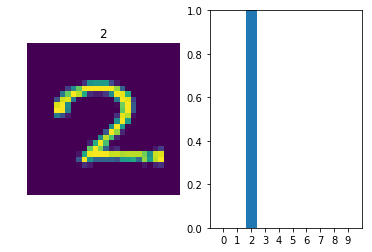

In [9]:
example = 29

one_hot_value = sample[1].get().T[example]
true_value = int(np.arange(10).dot(one_hot_value))
input_image = sample[0].get().T[example].reshape(28,28)
output_prediction = mlp.fprop(sample[0]).T.get()[example]

plt.subplot(121)
plt.imshow(input_image)
plt.axis('off')
plt.title(true_value)
plt.subplot(122)
plt.bar(range(10),output_prediction)
plt.axis([-1, 10, 0, 1])
plt.xticks(np.arange(10))
plt.show()

In [91]:
np.ones(10).dot(output_prediction)

0.99999993271194398

In [5]:
mlp.layers.layers[0].W

In [15]:
mlp.layers.layers[0].fprop(sample[0])

GPUTensor(base 0xb02d80000) name:None shape:(100, 32) dtype:float32 strides:(32, 1) is_trans:False is_contiguous:True

In [17]:
mlp.layers.layers[1].fprop(mlp.layers.layers[0].fprop(sample[0]))

GPUTensor(base 0xb02d80000) name:None shape:(100, 32) dtype:float32 strides:(32, 1) is_trans:False is_contiguous:True

In [44]:
def visualize_first_layer(nn,shape):
    assert len(shape)==2
    weights = nn.layers.layers[0].W.get()
    n_hidden_nodes, input_size = weights.shape
    assert input_size == shape[0]*shape[1]
    fig_rows, fig_cols = int(ceil(n_hidden_nodes/10.0)),10
    fig, axes = plt.subplots(fig_rows, fig_cols,figsize=(10, 10))
    for i in range(fig_rows):
        for j in range(fig_cols):
            axes[i,j].imshow(weights[i*10+j].reshape(shape))
            axes[i,j].axis('off')
    plt.show()

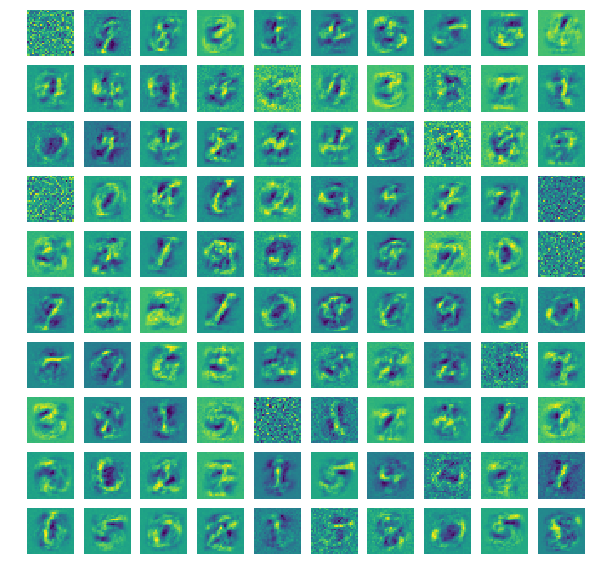

In [45]:
visualize_first_layer(mlp,(28,28))

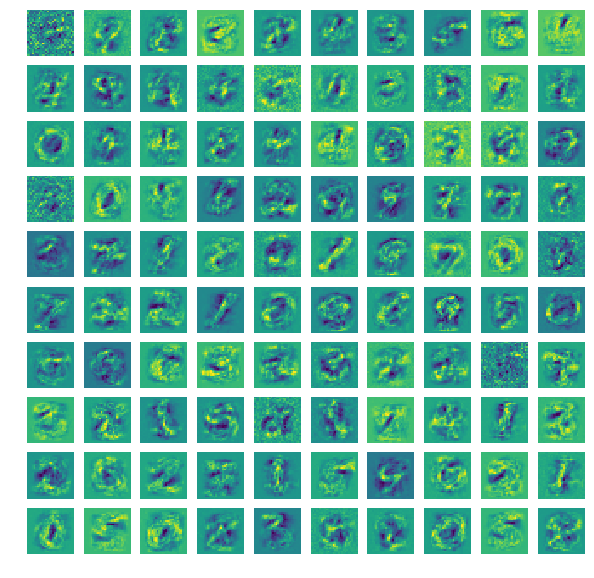

In [49]:
visualize_first_layer(mlp,(28,28))